In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

import joblib

In [ ]:
df_h1b =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/H1-B Visa Dataset/h1b_kaggle.csv")
#df_h1b = pd.read_csv(r"D:\Python Codes\Python Code\Kaggle Competions\H1-B Visa\h1b_kaggle.csv")

In [ ]:
df_h1b

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


We dont require Longitude and Latitude for predicting anything hence dropping those columns

In [ ]:
df_h1b = df_h1b.iloc[:,1:]
df_h1b = df_h1b.drop(["lon","lat"],axis=1)

In [ ]:
df_h1b.isnull().sum()

CASE_STATUS              13
EMPLOYER_NAME            59
SOC_NAME              17734
JOB_TITLE                43
FULL_TIME_POSITION       15
PREVAILING_WAGE          85
YEAR                     13
WORKSITE                  0
dtype: int64

In [ ]:
df_h1b = df_h1b.dropna()
df_h1b = df_h1b.reset_index(drop=True)

In [ ]:
df_h1b.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64

In [ ]:
df_h1b

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI"
...,...,...,...,...,...,...,...,...
2984604,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,"REDWOOD SHORES, CALIFORNIA"
2984605,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,"WEST VALLEY, UTAH"
2984606,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,"AKRON, OHIO"
2984607,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS"


Now the dataset is clear of NaN values, we can perform EDA

In [ ]:
#Checking unique values in CASE_STATUS
df_h1b.CASE_STATUS.unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

In [ ]:
df_h1b.CASE_STATUS.value_counts()

CERTIFIED                                             2600241
CERTIFIED-WITHDRAWN                                    201479
DENIED                                                  93761
WITHDRAWN                                               89110
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

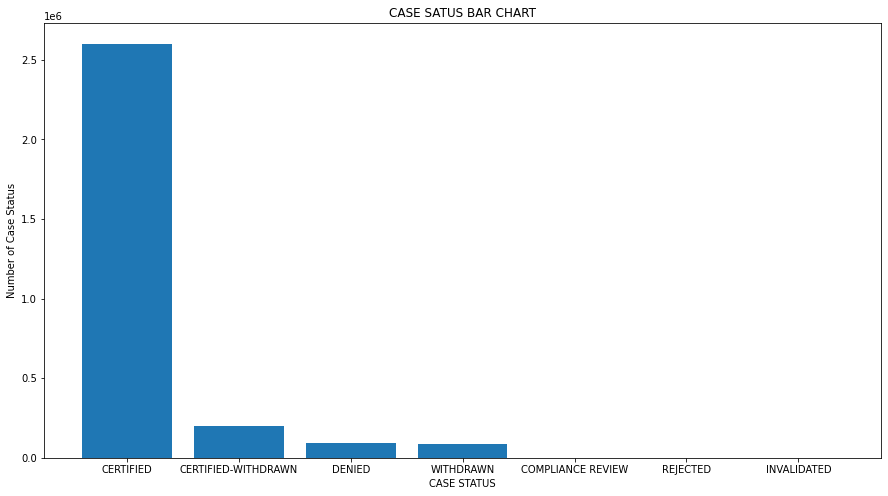

In [ ]:
case_values = list(df_h1b.CASE_STATUS.value_counts())
case_index = ["CERTIFIED","CERTIFIED-WITHDRAWN","DENIED","WITHDRAWN",
                 "COMPLIANCE REVIEW","REJECTED","INVALIDATED"]
plt.figure(figsize=(15,8))
plt.xlabel("CASE STATUS")
plt.ylabel("Number of Case Status")
plt.title("CASE SATUS BAR CHART")
plt.bar(case_index,case_values)
plt.show()

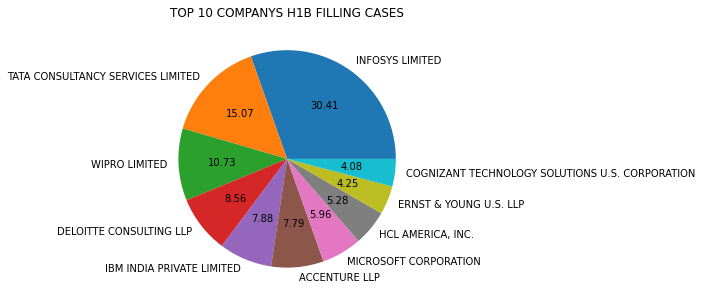

In [ ]:
comp_values = list(df_h1b.EMPLOYER_NAME.value_counts()[0:10])
comp_name = df_h1b.EMPLOYER_NAME.value_counts().keys()[0:10]
plt.figure(figsize=(5,5))
plt.pie(comp_values,labels=comp_name,autopct='%1.2f')
plt.title("TOP 10 COMPANYS H1B FILLING CASES")
plt.show()

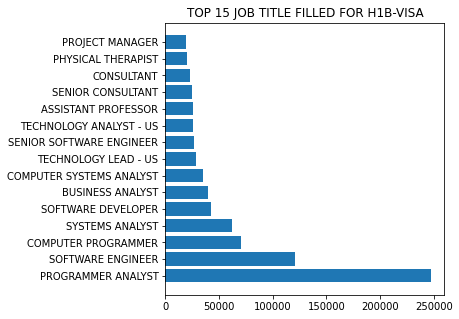

In [ ]:
job_name = df_h1b.JOB_TITLE.value_counts().keys()[0:15]
job_values = df_h1b.JOB_TITLE.value_counts()[0:15]
plt.figure(figsize=(5,5))
plt.title("TOP 15 JOB TITLE FILLED FOR H1B-VISA")
plt.barh(job_name,job_values)
plt.show()

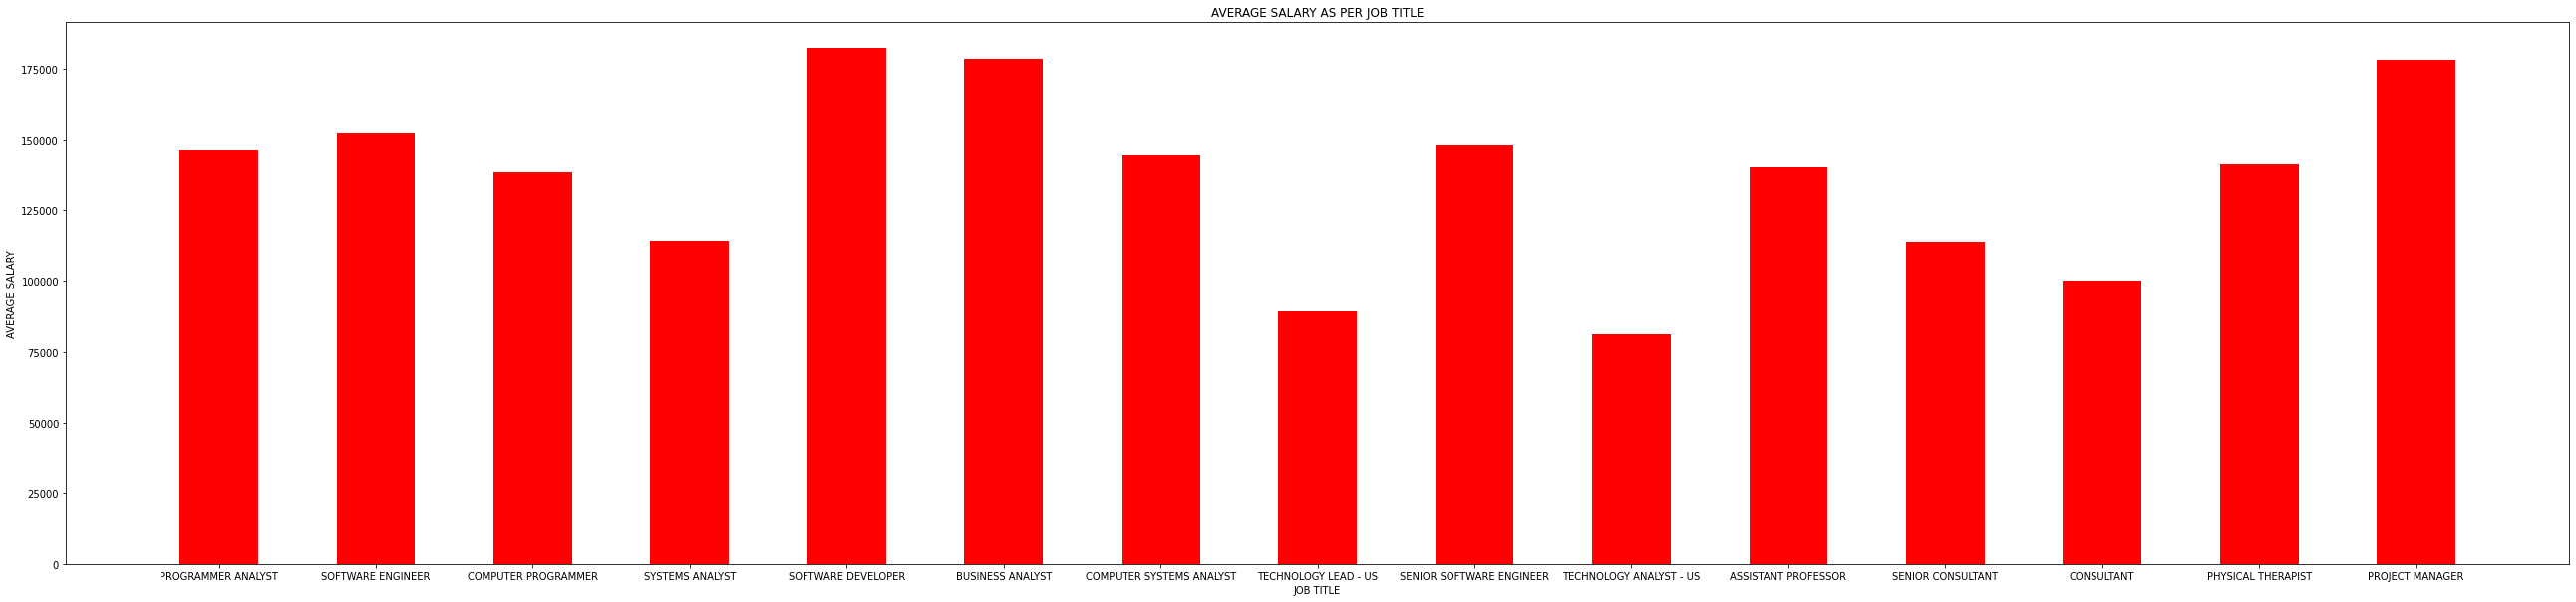

In [ ]:
avg_sal = []
job_pos = df_h1b.JOB_TITLE.value_counts().keys()[0:15]
for i in job_pos:
    temp = df_h1b[df_h1b.JOB_TITLE == i]
    avg_sal.append(temp.PREVAILING_WAGE.mean())

plt.figure(figsize=(45,10))
plt.xlabel("JOB TITLE")
plt.ylabel("AVERAGE SALARY")
plt.title("AVERAGE SALARY AS PER JOB TITLE")
plt.bar(job_pos,avg_sal,width=0.5,color="red")
plt.show()

In [ ]:
#Creating our Dependent Variable

y = []
for i in range(len(df_h1b)):
    if ((df_h1b.iloc[i,0] == "CERTIFIED-WITHDRAWN") or (df_h1b.iloc[i,0] == "CERTIFIED")):
        y.append(1)         
    else:
        y.append(0) 


In [ ]:
df_h1b_copy = df_h1b.copy()

In [ ]:
df_h1b_copy.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64

In [ ]:
len(y)

2984609

In [ ]:
df_h1b_copy

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,y,City,State,EMPLOYER_ACCEPTANCE,SOC_ACCEPTANCE,JOB_ACCEPTANCE,WAGE_CATEGORY
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",1,ANN ARBOR,MICHIGAN,VHA,VHA,VHA,VERY LOW
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",1,PLANO,TEXAS,VHA,VHA,VHA,VERY HIGH
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",1,JERSEY CITY,NEW JERSEY,VHA,VHA,VHA,VERY HIGH
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",1,DENVER,COLORADO,VHA,VHA,VHA,VERY HIGH
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",0,ST. LOUIS,MISSOURI,VHA,VHA,MA,VERY HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984604,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,"REDWOOD SHORES, CALIFORNIA",0,REDWOOD SHORES,CALIFORNIA,VHA,VHA,VHA,LOW
2984605,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,"WEST VALLEY, UTAH",0,WEST VALLEY,UTAH,HA,VHA,VHA,MEDIUM
2984606,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,"AKRON, OHIO",0,AKRON,OHIO,VHA,VHA,VHA,VERY LOW
2984607,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",0,CHELMSFORD,MASSACHUSETTS,VHA,VHA,VHA,LOW


In [ ]:
df_y = pd.DataFrame(y,columns=["y"])
df_h1b_copy = df_h1b_copy.join(df_y)
df_h1b_copy

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,y
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",1
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",1
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",1
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",1
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",0
...,...,...,...,...,...,...,...,...,...
2984604,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,"REDWOOD SHORES, CALIFORNIA",0
2984605,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,"WEST VALLEY, UTAH",0
2984606,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,"AKRON, OHIO",0
2984607,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",0


In [ ]:
year = []
accepted = []
rejected = []
uniq_year = df_h1b_copy.YEAR.unique()
for i in uniq_year:
    year.append(i)
    temp_y = df_h1b_copy[df_h1b_copy.YEAR == i]
    keys = temp_y.y.value_counts().keys()
    rejected.append(temp_y.y.value_counts()[0])
    accepted.append(temp_y.y.value_counts()[1])

In [ ]:
datas = {'Year':year,'Accepted':accepted,'Rejected':rejected}
df_year = pd.DataFrame(data=datas)
df_year

,Year,Accepted,Rejected
0,2016.0,616728,31053
1,2015.0,588348,30358
2,2014.0,487455,27681
3,2013.0,415020,23479
4,2012.0,380848,31523
5,2011.0,313321,38795


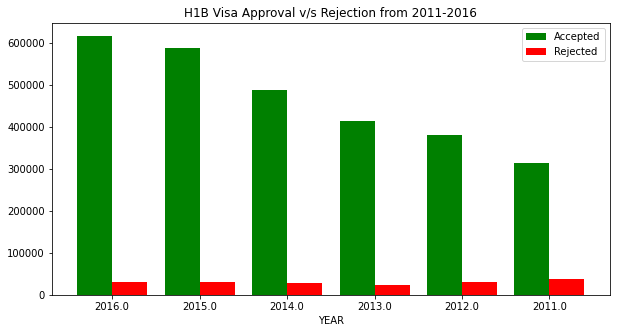

In [ ]:
n = len(df_year)
r = np.arange(n)

plt.figure(figsize=(10,5))
plt.bar(r,df_year.Accepted,0.4,color="green",label="Accepted")
plt.bar(r+0.4,df_year.Rejected,0.4,color="red",label="Rejected")
plt.title("H1B Visa Approval v/s Rejection from 2011-2016")
plt.xlabel("YEAR")
plt.xticks(r + 0.2,df_year.Year)
plt.legend()
plt.show()

In [ ]:
city = []
state = []
for i in range(len(df_h1b_copy)):
    c,s = df_h1b_copy.WORKSITE[i].split(", ")
    city.append(c)
    state.append(s)

In [ ]:
data = {"City":city,"State":state}
df_workplace = pd.DataFrame(data = data)
df_workplace

,City,State
0,ANN ARBOR,MICHIGAN
1,PLANO,TEXAS
2,JERSEY CITY,NEW JERSEY
3,DENVER,COLORADO
4,ST. LOUIS,MISSOURI
...,...,...
2984604,REDWOOD SHORES,CALIFORNIA
2984605,WEST VALLEY,UTAH
2984606,AKRON,OHIO
2984607,CHELMSFORD,MASSACHUSETTS


In [ ]:
df_h1b_copy = df_h1b_copy.join(df_workplace)
df_h1b_copy

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,y,City,State
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",1,ANN ARBOR,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",1,PLANO,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",1,JERSEY CITY,NEW JERSEY
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",1,DENVER,COLORADO
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",0,ST. LOUIS,MISSOURI
...,...,...,...,...,...,...,...,...,...,...,...
2984604,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,"REDWOOD SHORES, CALIFORNIA",0,REDWOOD SHORES,CALIFORNIA
2984605,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,"WEST VALLEY, UTAH",0,WEST VALLEY,UTAH
2984606,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,"AKRON, OHIO",0,AKRON,OHIO
2984607,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",0,CHELMSFORD,MASSACHUSETTS


In [ ]:
state_uni = df_h1b_copy.State.unique()
acc = []
rej = []
state = []
for i in state_uni:
    temp = df_h1b_copy[df_h1b_copy.State == i]
    state.append(i)
    acc.append(temp.y.value_counts()[1])
    rej.append(temp.y.value_counts()[0])

In [ ]:
data = {"State":state,"Accepted":acc,"Rejected":rej}
df_sate_h1b = pd.DataFrame(data=data)
df_sate_h1b

,State,Accepted,Rejected
0,MICHIGAN,77658,4640
1,TEXAS,275685,17528
2,NEW JERSEY,201146,11274
3,COLORADO,29595,2196
4,MISSOURI,32791,1895
5,FLORIDA,96630,8597
6,CALIFORNIA,521283,34731
7,VIRGINIA,84152,5319
8,PENNSYLVANIA,103999,5412
9,MASSACHUSETTS,108859,7025


In [ ]:
df_sate_h1b.sort_values(by=["Accepted"],inplace=True,ascending=False)

In [ ]:
print("The State with MOST ACCEPTED H1B Visa is: ",df_sate_h1b.State.values[0])
print("The State with LEAST ACCEPTED H1B Visa is: ",df_sate_h1b.State.values[-1])

The State with MOST ACCEPTED H1B Visa is:  CALIFORNIA
The State with LEAST ACCEPTED H1B Visa is:  WYOMING


In [ ]:
df_sate_h1b 

,State,Accepted,Rejected
6,CALIFORNIA,521283,34731
1,TEXAS,275685,17528
18,NEW YORK,268364,21641
2,NEW JERSEY,201146,11274
11,ILLINOIS,151367,8464
9,MASSACHUSETTS,108859,7025
8,PENNSYLVANIA,103999,5412
16,WASHINGTON,97758,4649
17,GEORGIA,96929,5877
5,FLORIDA,96630,8597


In [ ]:
Acceptance_prob = df_sate_h1b.Accepted/df_sate_h1b.sum(numeric_only=True,axis=1)
Acceptance_prob = Acceptance_prob.to_frame(name="Acceptance Probability")

In [ ]:
df_sate_h1b = df_sate_h1b.join(Acceptance_prob)
df_sate_h1b

,State,Accepted,Rejected,Acceptance Probability
6,CALIFORNIA,521283,34731,0.937536
1,TEXAS,275685,17528,0.940221
18,NEW YORK,268364,21641,0.925377
2,NEW JERSEY,201146,11274,0.946926
11,ILLINOIS,151367,8464,0.947044
9,MASSACHUSETTS,108859,7025,0.939379
8,PENNSYLVANIA,103999,5412,0.950535
16,WASHINGTON,97758,4649,0.954603
17,GEORGIA,96929,5877,0.942834
5,FLORIDA,96630,8597,0.918300


In [ ]:
df_sate_h1b.sort_values(by=["Acceptance Probability"],inplace=True,ascending=False)

In [ ]:
df_sate_h1b.reset_index(drop=True)

,State,Accepted,Rejected,Acceptance Probability
0,DELAWARE,17236,793,0.956015
1,WASHINGTON,97758,4649,0.954603
2,RHODE ISLAND,11165,535,0.954274
3,MINNESOTA,45944,2373,0.950887
4,PENNSYLVANIA,103999,5412,0.950535
5,WISCONSIN,30830,1608,0.950429
6,NORTH CAROLINA,75359,3940,0.950315
7,ARKANSAS,13916,745,0.949185
8,CONNECTICUT,47192,2550,0.948735
9,OHIO,71912,3911,0.948419


In [ ]:
totdf_e = df_h1b_copy.loc[:,['EMPLOYER_NAME', 'y']]
totdf_s = df_h1b_copy.loc[:,['SOC_NAME', 'y']]
totdf_j = df_h1b_copy.loc[:,['JOB_TITLE', 'y']]


totdf_e_po = totdf_e[totdf_e.y == 1].EMPLOYER_NAME
totdf_s_po = totdf_s[totdf_s.y == 1].SOC_NAME
totdf_j_po = totdf_j[totdf_j.y == 1].JOB_TITLE

positive_e = totdf_e_po.value_counts()
positive_s = totdf_s_po.value_counts()
positivej = totdf_j_po.value_counts()


total_e = totdf_e.EMPLOYER_NAME.value_counts()
total_s = totdf_s.SOC_NAME.value_counts()
total_j = totdf_j.JOB_TITLE.value_counts()

In [ ]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"
    

def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [ ]:
final_ratio_series = positive_e / total_e

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
df_h1b_copy['EMPLOYER_ACCEPTANCE'] = df_h1b_copy.EMPLOYER_NAME.map(final_classification_employer)

In [ ]:
final_ratio_series_s = positive_s / total_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
df_h1b_copy['SOC_ACCEPTANCE'] = df_h1b_copy.SOC_NAME.map(final_classification_soc)

In [ ]:
final_ratio_series_j = positivej / total_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
df_h1b_copy['JOB_ACCEPTANCE'] = df_h1b_copy.JOB_TITLE.map(final_classification_job)

In [ ]:
df_h1b_copy['WAGE_CATEGORY'] = df_h1b_copy['PREVAILING_WAGE'].apply(wage_categorization)

In [ ]:
df_h1b_copy

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,y,City,State,EMPLOYER_ACCEPTANCE,SOC_ACCEPTANCE,JOB_ACCEPTANCE,WAGE_CATEGORY
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",1,ANN ARBOR,MICHIGAN,VHA,VHA,VHA,VERY LOW
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",1,PLANO,TEXAS,VHA,VHA,VHA,VERY HIGH
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",1,JERSEY CITY,NEW JERSEY,VHA,VHA,VHA,VERY HIGH
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",1,DENVER,COLORADO,VHA,VHA,VHA,VERY HIGH
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",0,ST. LOUIS,MISSOURI,VHA,VHA,MA,VERY HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984604,WITHDRAWN,"ORACLE AMERICA, INC.","Software Developers, Applications",SOFTWARE ENGINEER (SOFTWARE DEVELOPER 2),Y,64800.0,2011.0,"REDWOOD SHORES, CALIFORNIA",0,REDWOOD SHORES,CALIFORNIA,VHA,VHA,VHA,LOW
2984605,WITHDRAWN,B & D DENTAL CORP.,Materials Scientists,MATERIALS SCIENTIST,N,70553.6,2011.0,"WEST VALLEY, UTAH",0,WEST VALLEY,UTAH,HA,VHA,VHA,MEDIUM
2984606,WITHDRAWN,"MEDTECH STAFFING & SOLUTIONS, INC",Market Research Analysts and Marketing Special...,MARKET RESEARCH ANALYST,Y,33800.0,2011.0,"AKRON, OHIO",0,AKRON,OHIO,VHA,VHA,VHA,VERY LOW
2984607,WITHDRAWN,LARSEN & TOUBRO LIMITED,Commercial and Industrial Designers,DESIGN ENGINEER,Y,59800.0,2011.0,"CHELMSFORD, MASSACHUSETTS",0,CHELMSFORD,MASSACHUSETTS,VHA,VHA,VHA,LOW


In [ ]:
X = df_h1b_copy.iloc[:,-5:]
X

,State,EMPLOYER_ACCEPTANCE,SOC_ACCEPTANCE,JOB_ACCEPTANCE,WAGE_CATEGORY
0,MICHIGAN,VHA,VHA,VHA,VERY LOW
1,TEXAS,VHA,VHA,VHA,VERY HIGH
2,NEW JERSEY,VHA,VHA,VHA,VERY HIGH
3,COLORADO,VHA,VHA,VHA,VERY HIGH
4,MISSOURI,VHA,VHA,MA,VERY HIGH
...,...,...,...,...,...
2984604,CALIFORNIA,VHA,VHA,VHA,LOW
2984605,UTAH,HA,VHA,VHA,MEDIUM
2984606,OHIO,VHA,VHA,VHA,VERY LOW
2984607,MASSACHUSETTS,VHA,VHA,VHA,LOW


In [ ]:
y = df_h1b_copy["y"]
y

0          1
1          1
2          1
3          1
4          0
          ..
2984604    0
2984605    0
2984606    0
2984607    0
2984608    0
Name: y, Length: 2984609, dtype: int64

In [ ]:
X = pd.get_dummies(X,drop_first=True)
X

,State_ALASKA,State_ARIZONA,State_ARKANSAS,State_CALIFORNIA,State_COLORADO,State_CONNECTICUT,State_DELAWARE,State_DISTRICT OF COLUMBIA,State_FLORIDA,State_GEORGIA,State_HAWAII,State_IDAHO,State_ILLINOIS,State_INDIANA,State_IOWA,State_KANSAS,State_KENTUCKY,State_LOUISIANA,State_MAINE,State_MARYLAND,State_MASSACHUSETTS,State_MICHIGAN,State_MINNESOTA,State_MISSISSIPPI,State_MISSOURI,State_MONTANA,State_NA,State_NEBRASKA,State_NEVADA,State_NEW HAMPSHIRE,State_NEW JERSEY,State_NEW MEXICO,State_NEW YORK,State_NORTH CAROLINA,State_NORTH DAKOTA,State_OHIO,State_OKLAHOMA,State_OREGON,State_PENNSYLVANIA,State_PUERTO RICO,State_RHODE ISLAND,State_SOUTH CAROLINA,State_SOUTH DAKOTA,State_TENNESSEE,State_TEXAS,State_UTAH,State_VERMONT,State_VIRGINIA,State_WASHINGTON,State_WEST VIRGINIA,State_WISCONSIN,State_WYOMING,EMPLOYER_ACCEPTANCE_HA,EMPLOYER_ACCEPTANCE_LA,EMPLOYER_ACCEPTANCE_MA,EMPLOYER_ACCEPTANCE_VHA,EMPLOYER_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,WAGE_CATEGORY_LOW,WAGE_CATEGORY_MEDIUM,WAGE_CATEGORY_VERY HIGH,WAGE_CATEGORY_VERY LOW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984604,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2984605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2984606,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2984607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)
print("X- Train Shape:",X_train.shape)
print("X- Test Shape:",X_test.shape)

X- Train Shape: (2089226, 71)
X- Test Shape: (895383, 71)


In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
predict_LR = model_LR.predict(X_test)
print("Accuracy is :", metrics.accuracy_score(y_test,predict_LR))
print("Confusion Matrix \n", metrics.confusion_matrix(y_test,predict_LR))
print("F-1 Score:", metrics.f1_score(y_test,predict_LR))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy is : 0.9466194913238245
Confusion Matrix 
 [[ 12286  42516]
 [  5280 835301]]
F-1 Score: 0.9721857218176465


In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
predict_DT = model_DT.predict(X_test)
print("Accuracy is :", metrics.accuracy_score(y_test,predict_DT))
print("Confusion Matrix \n", metrics.confusion_matrix(y_test,predict_DT))
print("F-1 Score:", metrics.f1_score(y_test,predict_DT))

Accuracy is : 0.9457595241365985
Confusion Matrix 
 [[ 11956  42846]
 [  5720 834861]]
F-1 Score: 0.9717358207704412


In [ ]:
model_MLP = MLPClassifier()
model_MLP.fit(X_train,y_train)
predict_MLP = model_MLP.predict(X_test)
print("Accuracy is :", metrics.accuracy_score(y_test,predict_MLP))
print("Confusion Matrix \n", metrics.confusion_matrix(y_test,predict_MLP))
print("F-1 Score:", metrics.f1_score(y_test,predict_MLP))

Accuracy is : 0.9468473267864143
Confusion Matrix 
 [[ 11512  43290]
 [  4302 836279]]
F-1 Score: 0.9723326454088307


In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
predict_RF = model_RF.predict(X_test)
print("Accuracy is :", metrics.accuracy_score(y_test,predict_RF))
print("Confusion Matrix \n", metrics.confusion_matrix(y_test,predict_RF))
print("F-1 Score:", metrics.f1_score(y_test,predict_RF))

Accuracy is : 0.9458019640757084
Confusion Matrix 
 [[ 11607  43195]
 [  5333 835248]]
F-1 Score: 0.9717700276435932


In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)
predict_NB = model_NB.predict(X_test)
print("Accuracy is :", metrics.accuracy_score(y_test,predict_NB))
print("Confusion Matrix \n", metrics.confusion_matrix(y_test,predict_NB))
print("F-1 Score:", metrics.f1_score(y_test,predict_NB))

Accuracy is : 0.9007743055206543
Confusion Matrix 
 [[ 25992  28810]
 [ 60035 780546]]
F-1 Score: 0.9461524894586885


In [ ]:
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train,y_train)
predict_GB = model_GB.predict(X_test)
print("Accuracy is :", metrics.accuracy_score(y_test,predict_GB))
print("Confusion Matrix \n", metrics.confusion_matrix(y_test,predict_GB))
print("F-1 Score:", metrics.f1_score(y_test,predict_GB))

Accuracy is : 0.9471410558386746
Confusion Matrix 
 [[ 12332  42470]
 [  4859 835722]]
F-1 Score: 0.9724634957612203


In [ ]:
joblib.dump(model_GB,"Gradient_Boosting.h5")

['Gradient_Boosting.h5']

In [ ]:
joblib.dump(df_h1b_copy,'df_h1b_copy.joblib')

['df_h1b_copy.joblib']